# Graficnado con Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
city = pd.read_csv("./city_temperature.csv")

/tmp/ipykernel_12989/2789416655.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  city = pd.read_csv("./city_temperature.csv")


In [3]:
city.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [4]:
city["AvgTemperature"] = (city["AvgTemperature"] - 32) * 5/9

In [10]:
city.loc[city["AvgTemperature"] < -50, "AvgTemperature"] = np.nan

In [11]:
city["AvgTemperature"] = city["AvgTemperature"].fillna(method="ffill")

In [5]:
city.drop(["Region", "State"], axis=1, inplace=True)

In [19]:
city.loc[city["Day"] > 28, "Day"] = np.nan
city.loc[city["Day"] < 1, "Day"] = np.nan

In [20]:
city["date"] = pd.to_datetime(city[["Year", "Month", "Day"]])

In [23]:
city.dtypes

Country                   object
City                      object
Month                      int64
Day                      float64
Year                       int64
AvgTemperature           float64
date              datetime64[ns]
dtype: object

In [24]:
BuenosAires = city[city["City"] == "Buenos Aires"].copy()

In [25]:
BuenosAires.head()

,Country,City,Month,Day,Year,AvgTemperature,date
1231460,Argentina,Buenos Aires,1,1.0,1995,28.000000,1995-01-01
1231461,Argentina,Buenos Aires,1,2.0,1995,23.944444,1995-01-02
1231462,Argentina,Buenos Aires,1,3.0,1995,23.166667,1995-01-03
1231463,Argentina,Buenos Aires,1,4.0,1995,25.055556,1995-01-04
1231464,Argentina,Buenos Aires,1,5.0,1995,26.388889,1995-01-05


<AxesSubplot:>

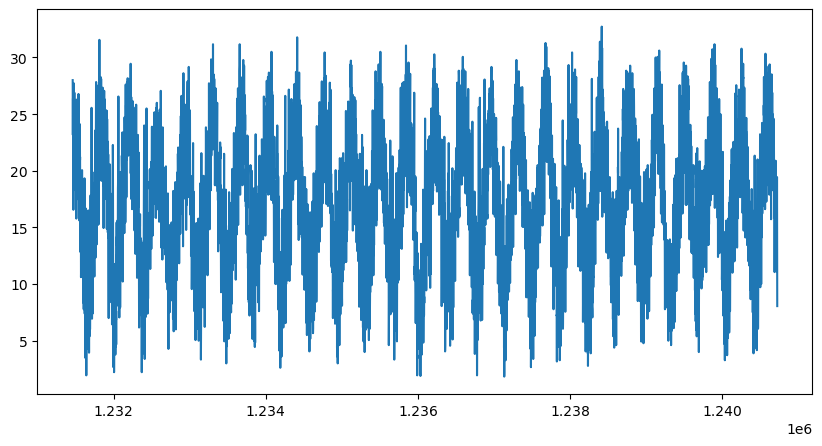

In [16]:
BuenosAires["AvgTemperature"].plot(figsize=(10,5))

In [26]:
BuenosAiresDate = BuenosAires.set_index("date")

In [27]:
BuenosAiresDate.head()

,Country,City,Month,Day,Year,AvgTemperature
date,,,,,,
1995-01-01,Argentina,Buenos Aires,1,1.0,1995,28.000000
1995-01-02,Argentina,Buenos Aires,1,2.0,1995,23.944444
1995-01-03,Argentina,Buenos Aires,1,3.0,1995,23.166667
1995-01-04,Argentina,Buenos Aires,1,4.0,1995,25.055556
1995-01-05,Argentina,Buenos Aires,1,5.0,1995,26.388889


In [32]:
import matplotlib.pyplot as plt
import datetime

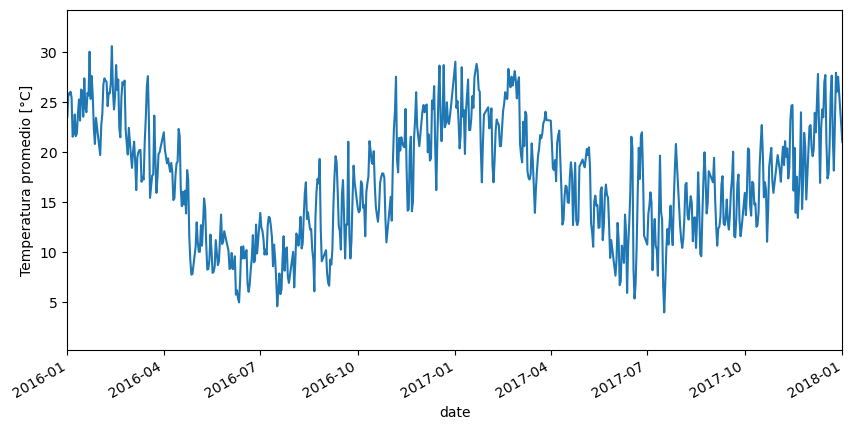

In [34]:
BuenosAiresDate["AvgTemperature"].plot(figsize=(10,5))
plt.ylabel("Temperatura promedio [°C]")
plt.xlim([datetime.datetime(2016,1,1), datetime.datetime(2018,1,1)]);

<AxesSubplot:>

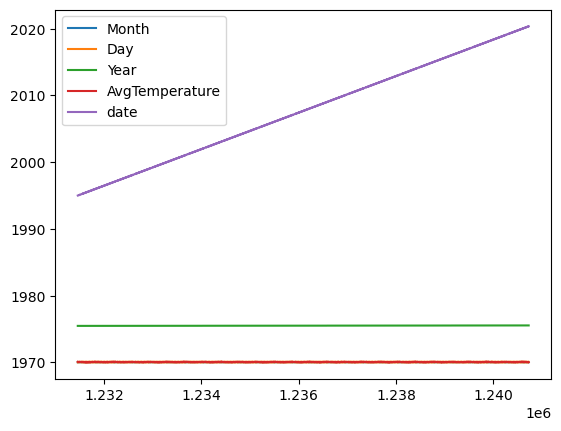

In [35]:
BuenosAires.plot()

In [36]:
Lima = city[city["City"] == "Lima"].copy()
Brasilia = city[city["City"] == "Brasilia"].copy()

In [37]:
Lima.set_index(["date"], inplace=True)
Brasilia.set_index(["date"], inplace=True)
BuenosAires.set_index(["date"], inplace=True)

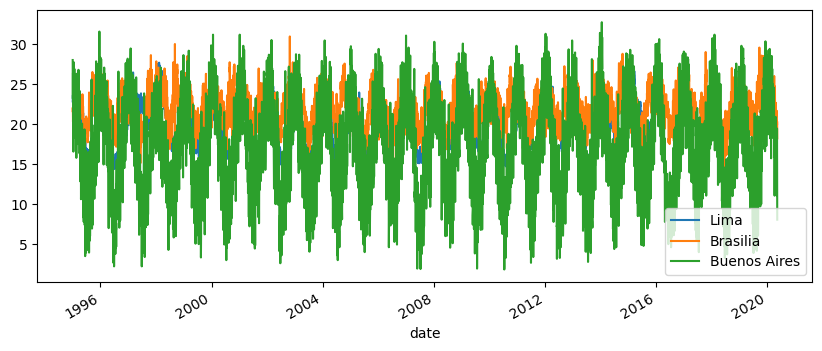

In [42]:
Lima["AvgTemperature"].plot(figsize=(10,4))
Brasilia["AvgTemperature"].plot()
BuenosAires["AvgTemperature"].plot()
plt.legend(["Lima", "Brasilia", "Buenos Aires"])

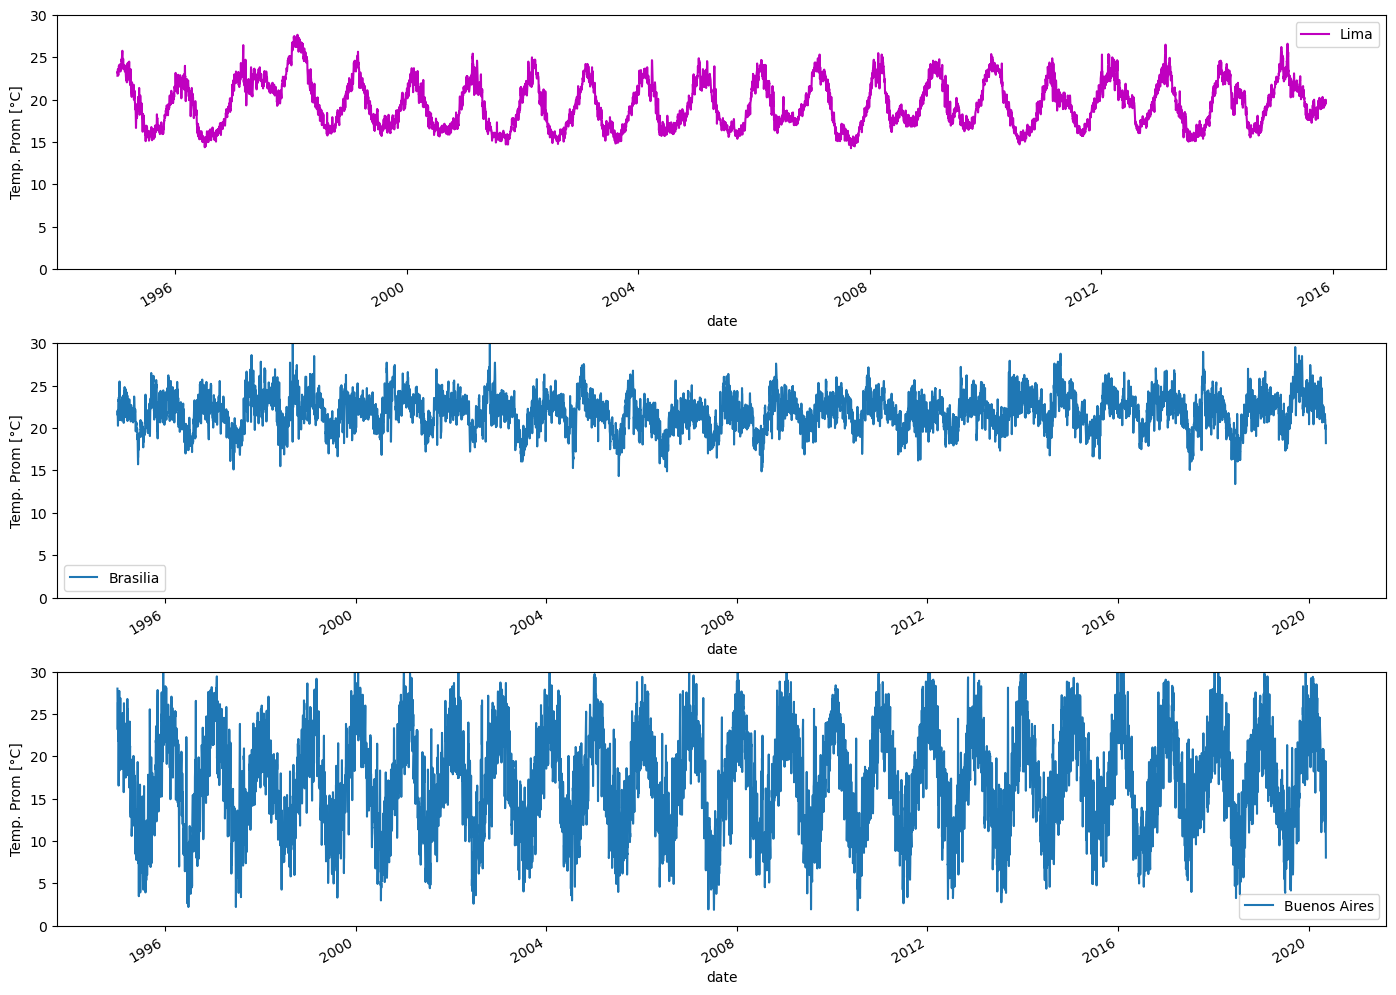

In [60]:
fig, ax = plt.subplots(3,1, figsize=(14,10))
Lima["AvgTemperature"].plot(ax=ax[0], color="m")
Brasilia["AvgTemperature"].plot(ax=ax[1])
BuenosAires["AvgTemperature"].plot(ax=ax[2])
ax[0].legend(["Lima"])
ax[1].legend(["Brasilia"])
ax[2].legend(["Buenos Aires"])
plt.tight_layout()
ax[0].set_ylabel("Temp. Prom [°C]")
ax[1].set_ylabel("Temp. Prom [°C]")
ax[2].set_ylabel("Temp. Prom [°C]")

ax[0].set_ylim([0, 30])
ax[1].set_ylim([0, 30])
ax[2].set_ylim([0, 30]);

In [61]:
wine = pd.read_csv("./winequality-red.csv", sep=";")

In [63]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:>

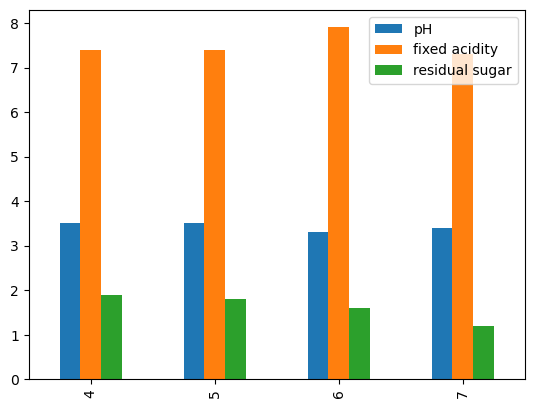

In [68]:
wine[["pH", "fixed acidity", "residual sugar"]].iloc[4:8].plot.bar()

<AxesSubplot:>

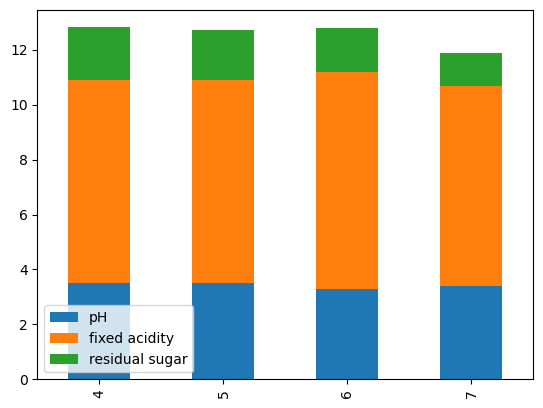

In [69]:
wine[["pH", "fixed acidity", "residual sugar"]].iloc[4:8].plot.bar(stacked=True)

# Histogramas

<AxesSubplot:ylabel='Frequency'>

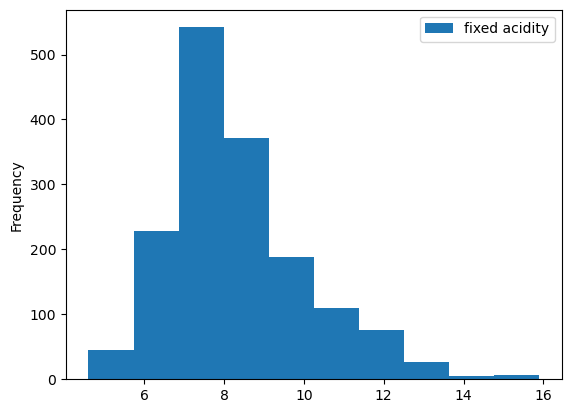

In [70]:
wine[["fixed acidity"]].plot.hist()

<AxesSubplot:ylabel='Frequency'>

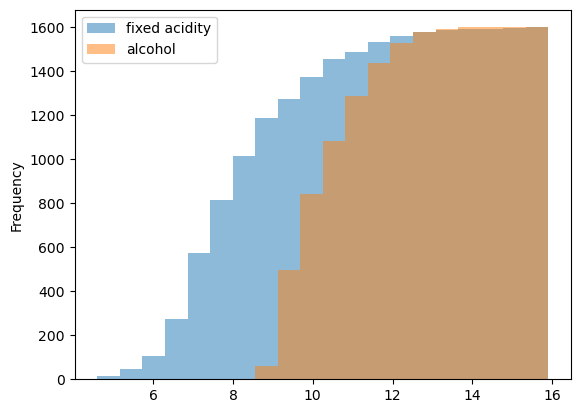

In [78]:
wine[["fixed acidity", "alcohol"]].plot.hist(alpha=0.5, bins=20, cumulative=True)

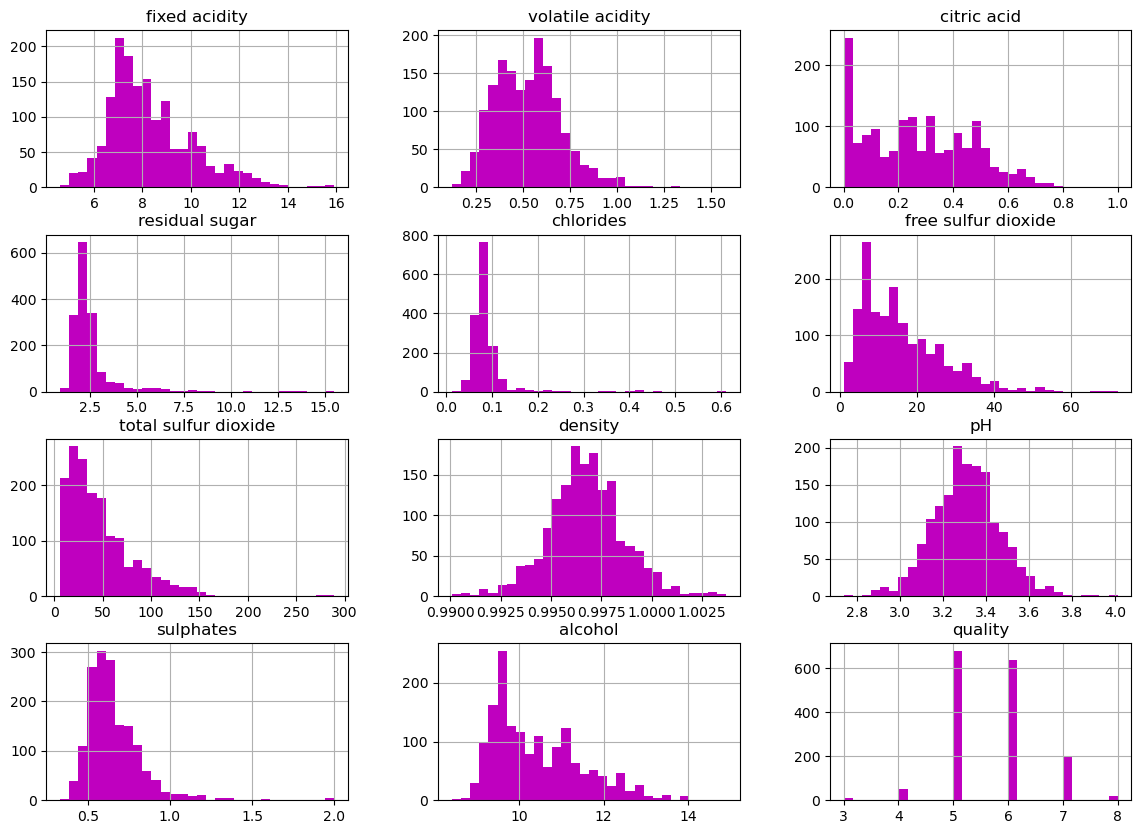

In [82]:
wine.hist(figsize=(14, 10), bins=30, color="m");

# Boxplot

<AxesSubplot:>

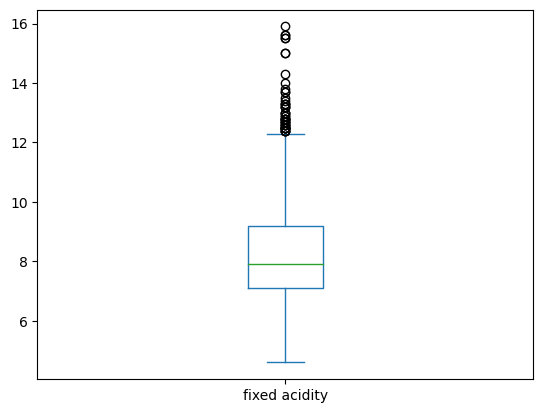

In [83]:
wine["fixed acidity"].plot.box()

In [98]:
temperatures = pd.concat([Lima.reset_index(), BuenosAires.reset_index(drop=True), Brasilia.reset_index(drop=True)], axis=1)

In [99]:
temperatures = temperatures[["date", "AvgTemperature"]]

In [101]:
temperatures.columns = ["date", "Lima", "Buenos Aires", "Brasilia"]

In [103]:
temperatures.drop("date", axis=1, inplace=True)

In [110]:
temperatures.dropna(inplace=True)

<AxesSubplot:>

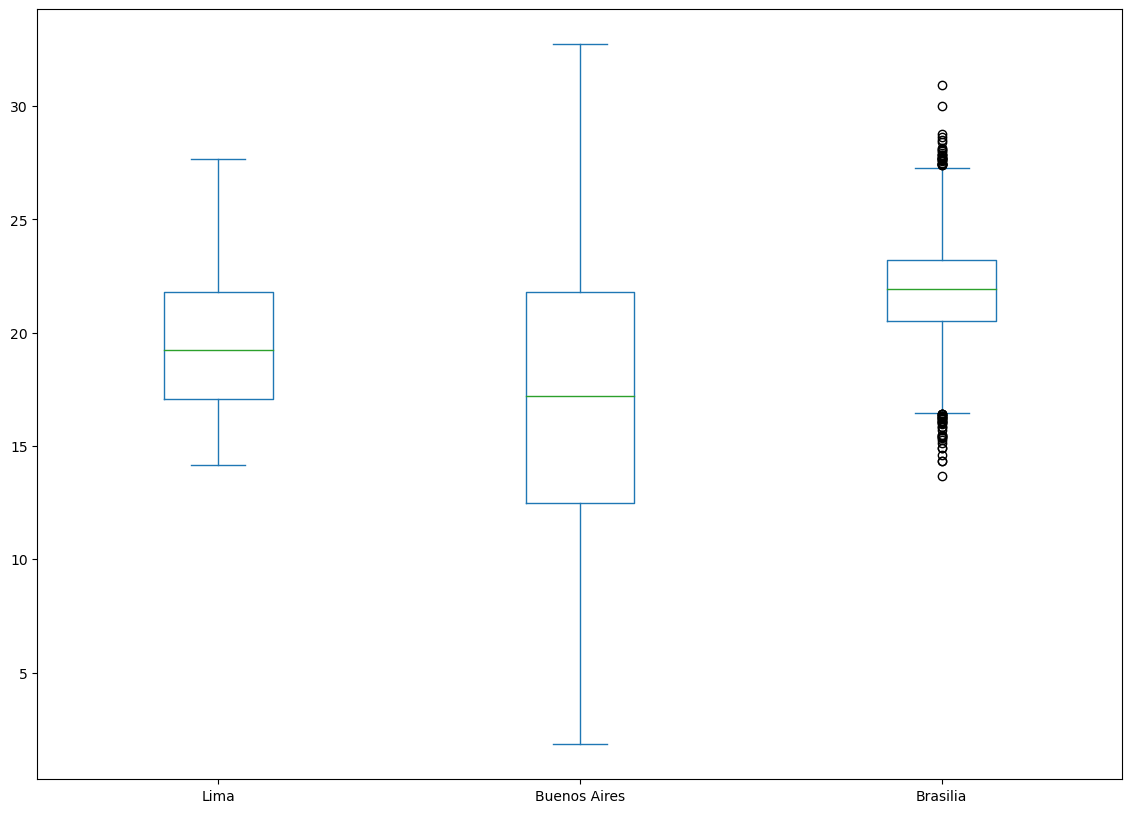

In [111]:
temperatures.plot.box(figsize=(14, 10))

<AxesSubplot:ylabel='Frequency'>

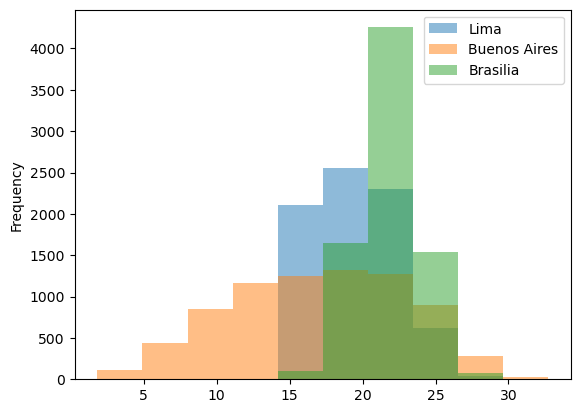

In [112]:
temperatures.plot.hist(alpha=0.5)

<AxesSubplot:>

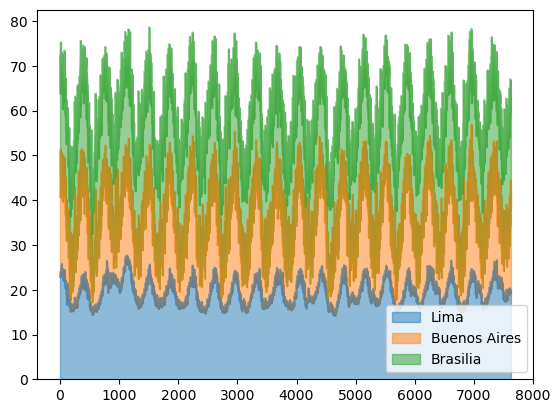

In [113]:
temperatures.plot.area(alpha=0.5)

# Scatter plot

In [114]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

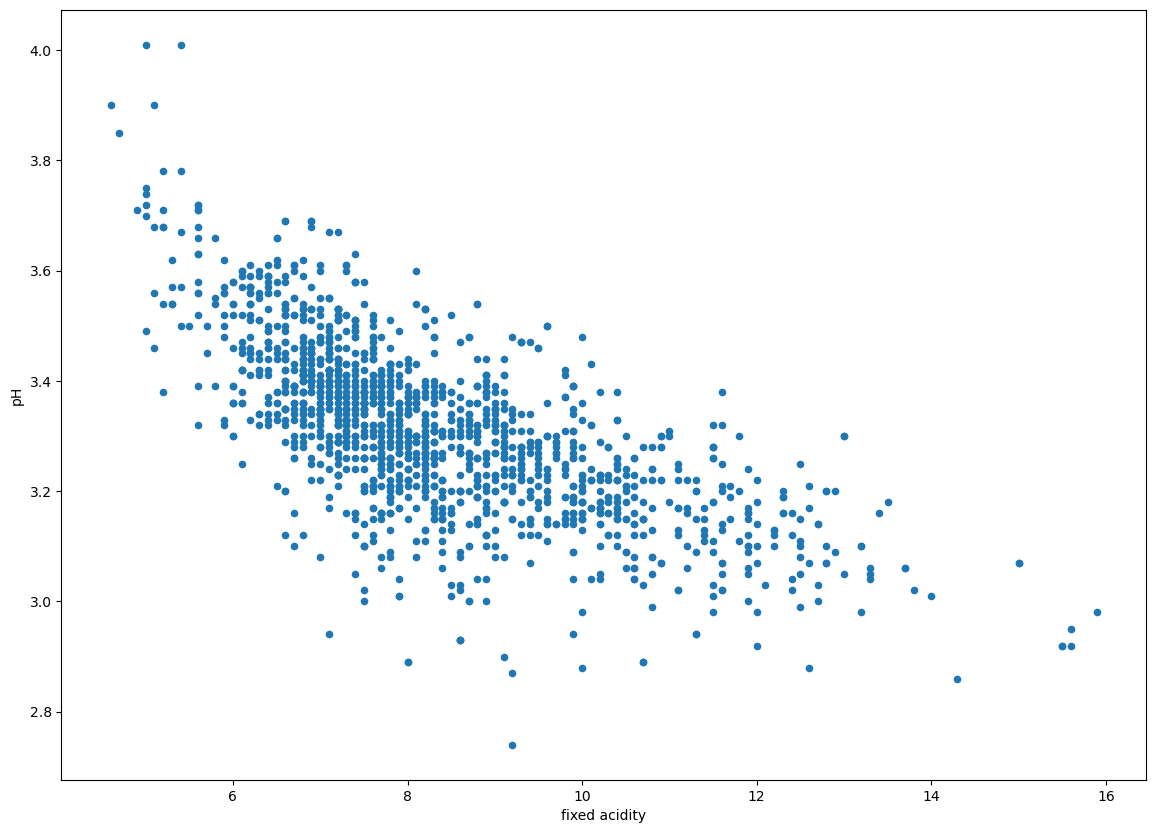

In [115]:
wine.plot.scatter(x="fixed acidity", y="pH", figsize=(14,10))

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

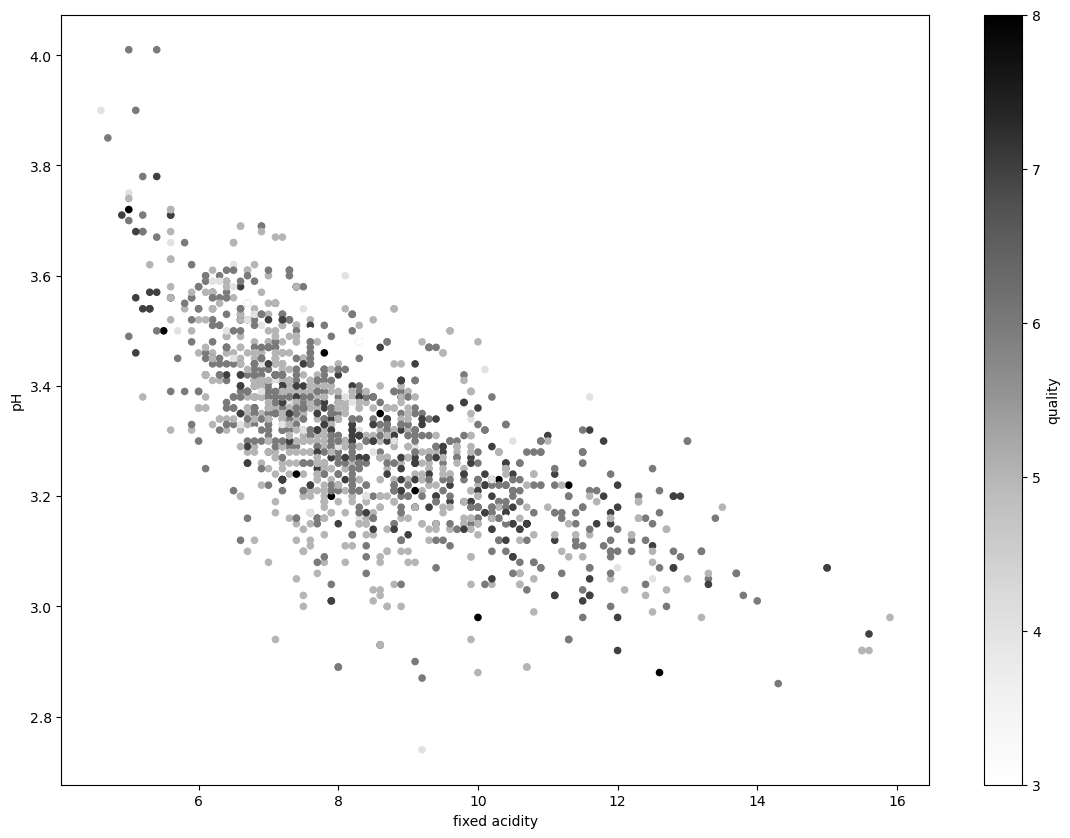

In [116]:
wine.plot.scatter(x="fixed acidity", y="pH", c="quality", figsize=(14,10))

In [117]:
import matplotlib as mpl

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

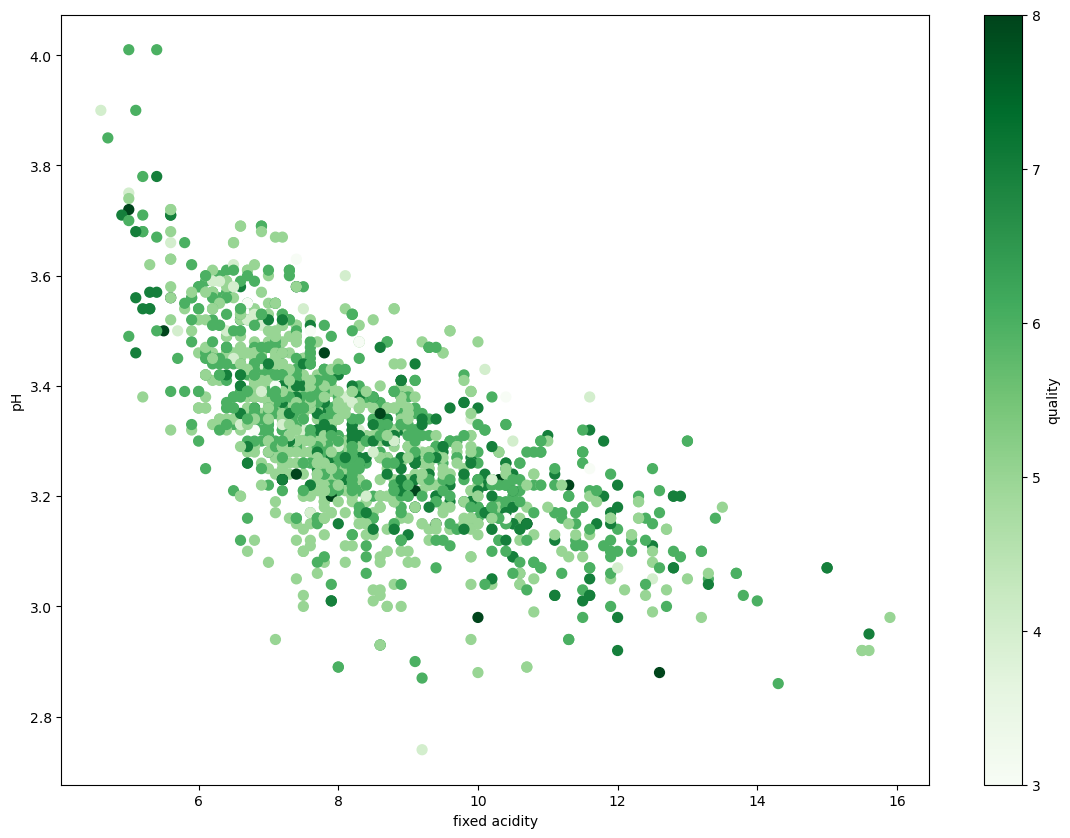

In [119]:
wine.plot.scatter(x="fixed acidity", y="pH", c="quality", figsize=(14, 10), s=50, cmap=mpl.colormaps["Greens"])

In [120]:
iris = pd.read_csv("iris.data", header=None)

In [121]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [122]:
iris.columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]

In [123]:
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica']

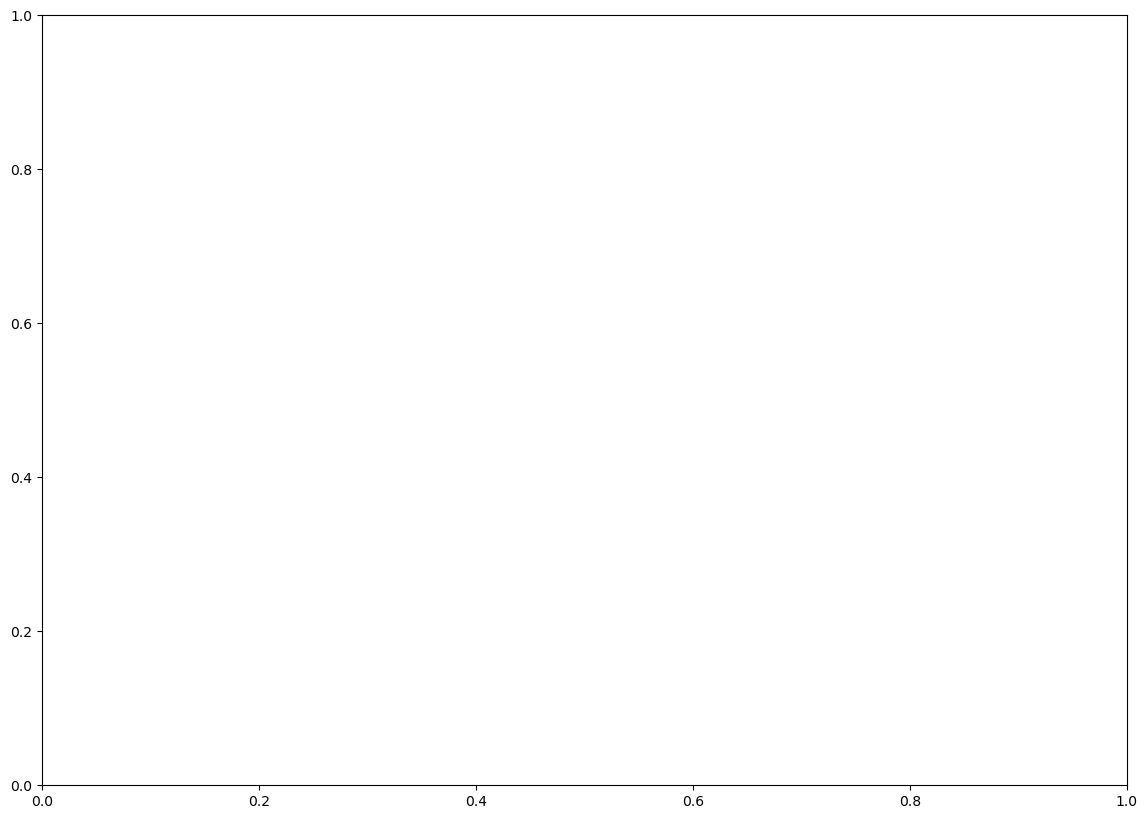

In [124]:
iris.plot.scatter(x="sepal length", y="sepal width", c="class", figsize=(14, 10), s=50, cmap=mpl.colormaps["Greens"])

In [127]:
iris["class_as_categorical"] = iris["class"].astype("category")

In [128]:
iris.dtypes

sepal length             float64
sepal width              float64
petal length             float64
petal width              float64
class                     object
class_as_categorical    category
dtype: object

<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>

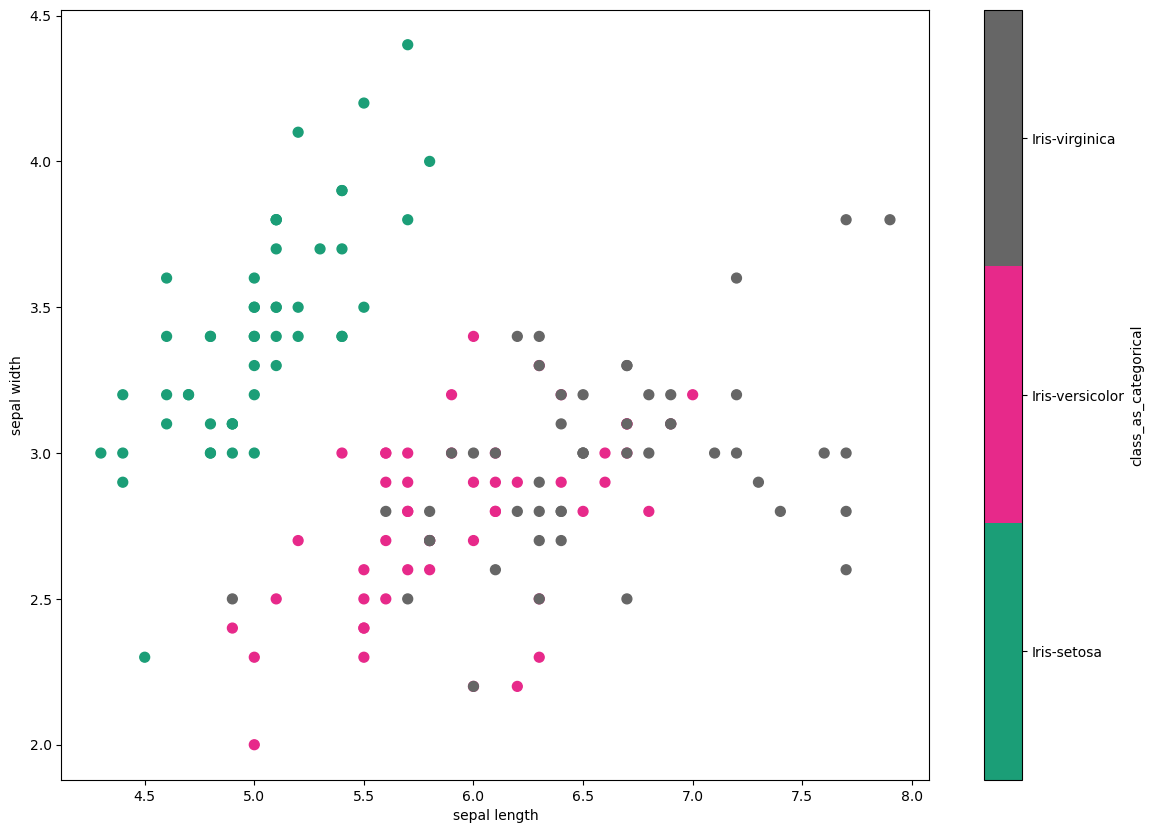

In [131]:
iris.plot.scatter(x="sepal length", y="sepal width", c="class_as_categorical", figsize=(14, 10), s=50, cmap=mpl.colormaps["Dark2"])

In [132]:
wine["alcohol_p"] = (wine["alcohol"] - wine["alcohol"].min() + 1) * 10

In [135]:
wine["alcohol"].max()

14.9

In [136]:
wine["alcohol"].min()

8.4

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

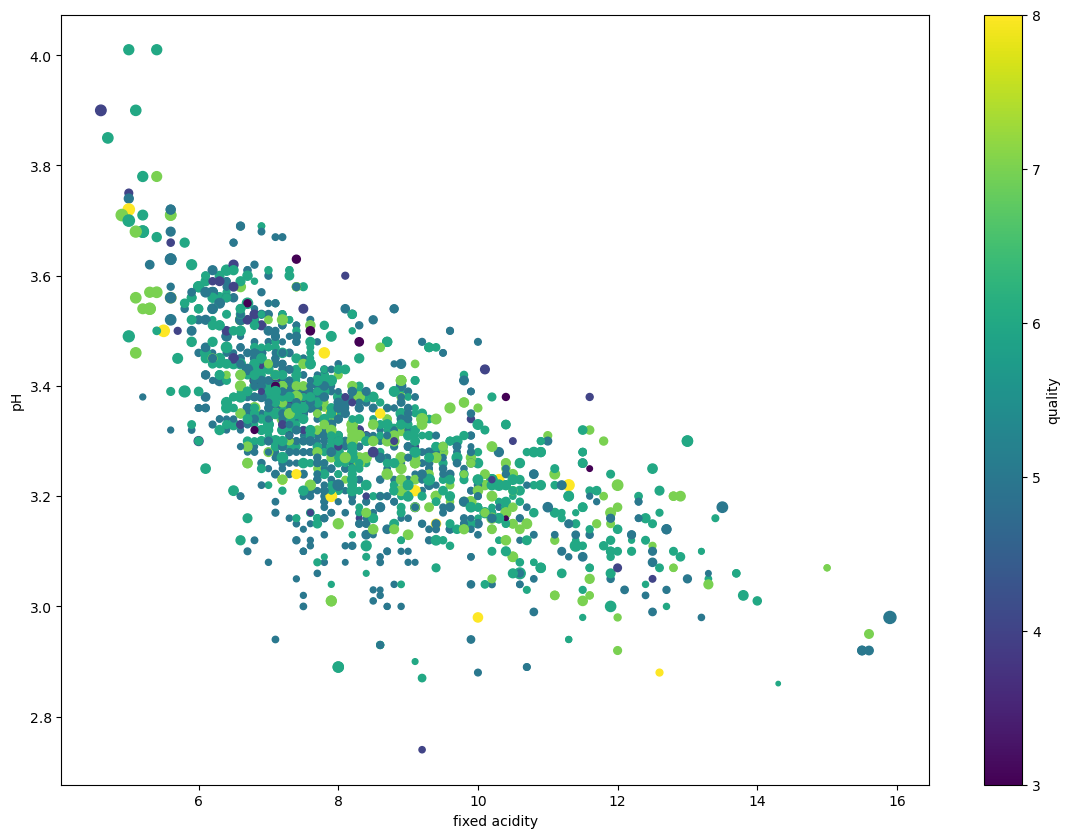

In [137]:
wine.plot.scatter(x="fixed acidity", y="pH", c="quality", s="alcohol_p", figsize=(14, 10), cmap=mpl.colormaps["viridis"])

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

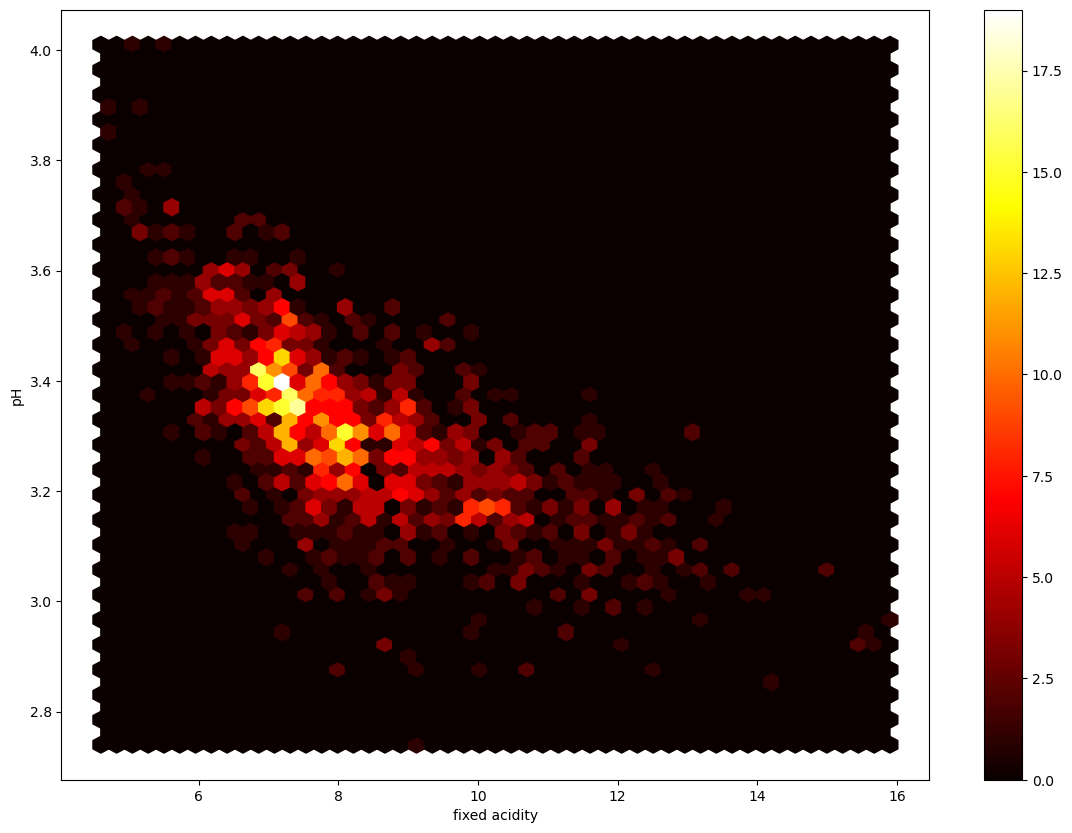

In [139]:
wine.plot.hexbin(x="fixed acidity", y="pH", figsize=(14, 10), cmap=mpl.colormaps["hot"], gridsize=50)